### Feature Engineering with K-fold

In [5]:
import numpy as np

# Add models here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm

# Sklearn imports for processing and evaluation
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


# Plotting
from matplotlib import pyplot as plt

# Misc
import time
from tqdm import tqdm

In [6]:
x_train = np.loadtxt('X_train.txt')
y_train = np.loadtxt('Y_train.txt')

x_test = np.loadtxt('X_test.txt')
y_test = np.loadtxt('Y_test.txt')

In [7]:
combined_x = np.concatenate((x_train, x_test))
combined_y = np.concatenate((y_train, y_test))

assert combined_x.shape[0] == x_train.shape[0] + x_test.shape[0]
assert combined_y.shape[0] == y_train.shape[0] + y_test.shape[0]

In [8]:
def do_kfold_pca(model, x_data, y_data, features='all', folds=10):
     
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(x_data[train_idx])
        standardized = scalar.transform(x_data[train_idx])
        transformed = pca.fit_transform(standardized)
        
        # Fit and time model
        start = time.time()
        model.fit(transformed, y_data[train_idx])
        fit_times.append(time.time() - start)
        
        # Transform test data and evaluate
        test_transform = np.dot(scalar.transform(x_data[test_idx]), pca.components_.T)
        preds = model.predict(test_transform)
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [9]:
# Number of PCA Components
num_features = np.array([2,10,20,30,40,50,60,70,80,90,100,200,300,400,500])

results = []
times = []
for features in num_features:
    pred_accuracy, fit_times = do_kfold_pca(svm.SVC(kernel='linear', C=1), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

10it [00:40,  4.03s/it]
0it [00:00, ?it/s]

2 FEATURES PREDICTION ACCURACY: 0.540 $\pm$ 0.049


10it [00:19,  1.96s/it]
0it [00:00, ?it/s]

10 FEATURES PREDICTION ACCURACY: 0.845 $\pm$ 0.027


10it [00:21,  2.16s/it]
0it [00:00, ?it/s]

20 FEATURES PREDICTION ACCURACY: 0.883 $\pm$ 0.034


10it [00:21,  2.15s/it]
0it [00:00, ?it/s]

30 FEATURES PREDICTION ACCURACY: 0.898 $\pm$ 0.033


10it [00:20,  2.04s/it]
0it [00:00, ?it/s]

40 FEATURES PREDICTION ACCURACY: 0.907 $\pm$ 0.029


10it [00:22,  2.26s/it]
0it [00:00, ?it/s]

50 FEATURES PREDICTION ACCURACY: 0.916 $\pm$ 0.025


10it [00:21,  2.10s/it]
0it [00:00, ?it/s]

60 FEATURES PREDICTION ACCURACY: 0.914 $\pm$ 0.023


10it [00:20,  2.06s/it]
0it [00:00, ?it/s]

70 FEATURES PREDICTION ACCURACY: 0.920 $\pm$ 0.023


10it [00:18,  1.87s/it]
0it [00:00, ?it/s]

80 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.024


10it [00:19,  1.93s/it]
0it [00:00, ?it/s]

90 FEATURES PREDICTION ACCURACY: 0.934 $\pm$ 0.023


10it [00:19,  1.99s/it]
0it [00:00, ?it/s]

100 FEATURES PREDICTION ACCURACY: 0.931 $\pm$ 0.022


10it [00:24,  2.42s/it]
0it [00:00, ?it/s]

200 FEATURES PREDICTION ACCURACY: 0.952 $\pm$ 0.020


10it [00:30,  3.05s/it]
0it [00:00, ?it/s]

300 FEATURES PREDICTION ACCURACY: 0.957 $\pm$ 0.022


10it [00:38,  3.88s/it]
0it [00:00, ?it/s]

400 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.020


10it [00:31,  3.14s/it]

500 FEATURES PREDICTION ACCURACY: 0.958 $\pm$ 0.020


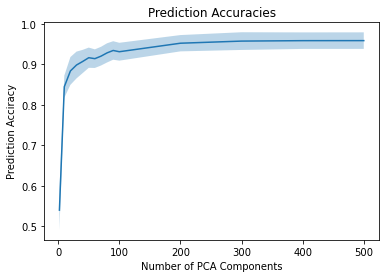

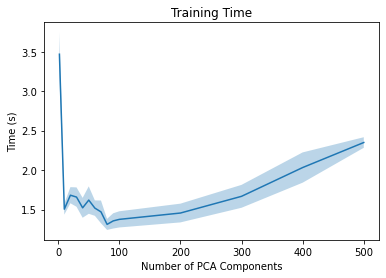

In [10]:
# Get means
acc_mean = np.mean(results, axis=1)
acc_stds = np.std(results, axis=1)
time_mean = np.mean(times, axis=1)
time_stds = np.std(times, axis=1)

# Plot prediction accuracies
fig, ax = plt.subplots()
ax.plot(num_features, acc_mean)
ax.fill_between(num_features, acc_mean+acc_stds, acc_mean-acc_stds, alpha=0.3)
ax.set(title="Prediction Accuracies", xlabel="Number of PCA Components", ylabel="Prediction Acciracy")
plt.show()

# Plot timing
fig, ax = plt.subplots()
ax.plot(num_features, time_mean)
ax.fill_between(num_features, time_mean+time_stds, time_mean-time_stds, alpha=0.3)
ax.set(title="Training Time", xlabel="Number of PCA Components", ylabel="Time (s)")
plt.show()

### Neural network

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import argmax
from pandas import read_csv
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [22]:
for i in range (0,len(combined_y)):
    combined_y[i] = combined_y[i]-1

In [58]:
def do_kfold(x_data, y_data, features='all', folds=10):
    start = time.time()
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(x_data[train_idx])
        standardized = scalar.transform(x_data[train_idx])
        transformed = pca.fit_transform(standardized)
        
        # Fit and time model
        
        x = x_data[train_idx].astype('float32')
        n_features = x_data[train_idx].shape[1]
        k1 = transformed.shape[1]
        print(k1)
        model = Sequential()
        model.add(Dense(k1, activation='relu', kernel_initializer='he_normal', input_shape=(k1,)))
        model.add(Dense(384, activation='relu',  kernel_initializer='he_normal'))
        model.add(Dense(6,activation='softmax'))
        
        opt = optimizers.SGD(lr=0.001, momentum=0.5,  decay=0.0001)
        optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
        
        model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(transformed, y_data[train_idx])
        
        
        # Transform test data and evaluate
        test_transform = np.dot(scalar.transform(x_data[test_idx]), pca.components_.T)
        preds = model.predict(test_transform)
        #print(preds)
        #print(y_data[test_idx])
        loss, score = model.evaluate(test_transform, y_data[test_idx], verbose=0)
        #score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        fit_times.append(time.time() - start)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [59]:
# Number of PCA Components
num_features = np.array([2,10,20,30,40,50,60,70,80,90,100,200,300,400,500, 560])

results1 = []
times1 = []
for features in num_features:
    pred_accuracy, fit_times = do_kfold(combined_x, combined_y, features=features)
    results1.append(pred_accuracy)
    times1.append(fit_times)

0it [00:00, ?it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 827us/step - loss: 1.6000 - accuracy: 0.3762


1it [00:00,  1.07it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - ETA: 0s - loss: 1.5611 - accuracy: 0.41 - 0s 818us/step - loss: 1.5209 - accuracy: 0.4209


2it [00:01,  1.06it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 803us/step - loss: 2.1421 - accuracy: 0.4246


3it [00:02,  1.07it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 846us/step - loss: 1.8351 - accuracy: 0.3841


4it [00:03,  1.06it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 820us/step - loss: 1.4652 - accuracy: 0.36010s - loss: 1.5082 - accuracy: 0.35


5it [00:04,  1.07it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 826us/step - loss: 1.7668 - accuracy: 0.4049


6it [00:05,  1.08it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 816us/step - loss: 1.5944 - accuracy: 0.3726


7it [00:06,  1.08it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 831us/step - loss: 1.6939 - accuracy: 0.4098


8it [00:07,  1.08it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 830us/step - loss: 1.8961 - accuracy: 0.3916


9it [00:08,  1.08it/s]

2


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 868us/step - loss: 2.5283 - accuracy: 0.4011


10it [00:09,  1.06it/s]
0it [00:00, ?it/s]

2 FEATURES PREDICTION ACCURACY: 0.409 $\pm$ 0.033
10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 857us/step - loss: 0.8393 - accuracy: 0.7247


1it [00:00,  1.07it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 909us/step - loss: 0.8884 - accuracy: 0.6980


2it [00:01,  1.03it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 921us/step - loss: 0.7884 - accuracy: 0.7108


3it [00:02,  1.03it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 860us/step - loss: 0.8010 - accuracy: 0.7267


4it [00:03,  1.04it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 859us/step - loss: 0.9591 - accuracy: 0.6608


5it [00:04,  1.05it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 903us/step - loss: 0.7148 - accuracy: 0.7444


6it [00:05,  1.03it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 890us/step - loss: 0.8170 - accuracy: 0.7368


7it [00:06,  1.04it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 909us/step - loss: 0.9090 - accuracy: 0.7168


8it [00:07,  1.03it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 0s 857us/step - loss: 0.9004 - accuracy: 0.7246


9it [00:08,  1.02it/s]

10


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.8262 - accuracy: 0.7289


10it [00:09,  1.00it/s]
0it [00:00, ?it/s]

10 FEATURES PREDICTION ACCURACY: 0.768 $\pm$ 0.035
20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.7610 - accuracy: 0.7580: 0s - loss: 0.8183 - accuracy: 0.74


1it [00:01,  1.47s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.6561 - accuracy: 0.7559


2it [00:02,  1.35s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.7314 - accuracy: 0.7494


3it [00:03,  1.28s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5673 - accuracy: 0.7838


4it [00:05,  1.28s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.7723 - accuracy: 0.7598


5it [00:06,  1.28s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.6236 - accuracy: 0.7677


6it [00:07,  1.30s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.6527 - accuracy: 0.7760


7it [00:09,  1.30s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.6651 - accuracy: 0.7663


8it [00:10,  1.27s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.6822 - accuracy: 0.7802


9it [00:11,  1.25s/it]

20


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5150 - accuracy: 0.7978


10it [00:12,  1.28s/it]
0it [00:00, ?it/s]

20 FEATURES PREDICTION ACCURACY: 0.829 $\pm$ 0.020
30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 964us/step - loss: 0.5007 - accuracy: 0.8236


1it [00:01,  1.29s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.8159


2it [00:02,  1.38s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5879 - accuracy: 0.7867: 0s - loss: 0.5929 - accuracy: 0.78


3it [00:03,  1.33s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4992 - accuracy: 0.8290


4it [00:05,  1.30s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4931 - accuracy: 0.8149


5it [00:06,  1.28s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.6059 - accuracy: 0.7942


6it [00:07,  1.26s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.6430 - accuracy: 0.7762


7it [00:08,  1.26s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.7360 - accuracy: 0.7923


8it [00:10,  1.25s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4855 - accuracy: 0.8225


9it [00:11,  1.25s/it]

30


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.7783 - accuracy: 0.7696


10it [00:12,  1.27s/it]
0it [00:00, ?it/s]

30 FEATURES PREDICTION ACCURACY: 0.857 $\pm$ 0.030
40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4966 - accuracy: 0.8335


1it [00:01,  1.29s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5080 - accuracy: 0.8299


2it [00:02,  1.29s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4491 - accuracy: 0.8411


3it [00:04,  1.37s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4996 - accuracy: 0.8328


4it [00:05,  1.32s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5137 - accuracy: 0.8192


5it [00:06,  1.31s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5448 - accuracy: 0.8202


6it [00:07,  1.31s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4601 - accuracy: 0.8318


7it [00:09,  1.30s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4808 - accuracy: 0.8276: 0s - loss: 0.5980 - accuracy: 0.78 - ETA: 0s - loss: 0.5297 - accuracy: 0.


8it [00:10,  1.29s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4362 - accuracy: 0.8409


9it [00:11,  1.29s/it]

40


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.8310


10it [00:12,  1.30s/it]
0it [00:00, ?it/s]

40 FEATURES PREDICTION ACCURACY: 0.870 $\pm$ 0.033
50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4750 - accuracy: 0.8384


1it [00:01,  1.34s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4438 - accuracy: 0.8408


2it [00:02,  1.35s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3966 - accuracy: 0.8603


3it [00:04,  1.34s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8541


4it [00:05,  1.35s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4211 - accuracy: 0.8492


5it [00:06,  1.40s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4142 - accuracy: 0.8513


6it [00:08,  1.38s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5132 - accuracy: 0.8327


7it [00:09,  1.36s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4601 - accuracy: 0.8366


8it [00:10,  1.35s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.5112 - accuracy: 0.8235


9it [00:12,  1.34s/it]

50


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8462


10it [00:13,  1.35s/it]
0it [00:00, ?it/s]

50 FEATURES PREDICTION ACCURACY: 0.896 $\pm$ 0.031
60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 0.8638


1it [00:01,  1.28s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3930 - accuracy: 0.8544


2it [00:02,  1.26s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4027 - accuracy: 0.8593


3it [00:03,  1.28s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3456 - accuracy: 0.8734


4it [00:05,  1.29s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3799 - accuracy: 0.8585


5it [00:06,  1.34s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4659 - accuracy: 0.8399


6it [00:07,  1.32s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8613


7it [00:09,  1.31s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3821 - accuracy: 0.8588


8it [00:10,  1.30s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4218 - accuracy: 0.8453: 0s - loss: 0.4834 - accuracy: 0.


9it [00:11,  1.29s/it]

60


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3557 - accuracy: 0.8636


10it [00:13,  1.30s/it]
0it [00:00, ?it/s]

60 FEATURES PREDICTION ACCURACY: 0.893 $\pm$ 0.024
70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3753 - accuracy: 0.8659


1it [00:01,  1.50s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3682 - accuracy: 0.8677


2it [00:02,  1.40s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3657 - accuracy: 0.8683


3it [00:04,  1.37s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3688 - accuracy: 0.8663


4it [00:05,  1.35s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3851 - accuracy: 0.8627


5it [00:07,  1.42s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3771 - accuracy: 0.8655


6it [00:08,  1.38s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3678 - accuracy: 0.8621


7it [00:09,  1.36s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3702 - accuracy: 0.8633


8it [00:10,  1.35s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3796 - accuracy: 0.8627


9it [00:12,  1.35s/it]

70


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.4111 - accuracy: 0.8483


10it [00:13,  1.36s/it]
0it [00:00, ?it/s]

70 FEATURES PREDICTION ACCURACY: 0.893 $\pm$ 0.021
80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3439 - accuracy: 0.8737: 0s - loss: 0.4002 - accuracy: 0.85 - ETA: 0s - loss: 0.3660 - accuracy: 0.86


1it [00:01,  1.33s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3481 - accuracy: 0.8743


2it [00:02,  1.34s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8736


3it [00:04,  1.35s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8738


4it [00:05,  1.36s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3696 - accuracy: 0.8669


5it [00:06,  1.36s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3444 - accuracy: 0.8683


6it [00:08,  1.43s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3633 - accuracy: 0.8671


7it [00:09,  1.39s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3417 - accuracy: 0.8761


8it [00:10,  1.38s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3591 - accuracy: 0.8699


9it [00:12,  1.37s/it]

80


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3661 - accuracy: 0.8693


10it [00:13,  1.37s/it]
0it [00:00, ?it/s]

80 FEATURES PREDICTION ACCURACY: 0.896 $\pm$ 0.025
90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3628 - accuracy: 0.8677


1it [00:01,  1.46s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3475 - accuracy: 0.8714


2it [00:02,  1.43s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3237 - accuracy: 0.8828


3it [00:04,  1.47s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3434 - accuracy: 0.8757


4it [00:05,  1.49s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3630 - accuracy: 0.8714


5it [00:07,  1.49s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3454 - accuracy: 0.8791: 0s - loss: 0.4806 - accuracy: 


6it [00:08,  1.45s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3333 - accuracy: 0.8800


7it [00:10,  1.50s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3615 - accuracy: 0.8737


8it [00:11,  1.45s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3485 - accuracy: 0.8752


9it [00:13,  1.44s/it]

90


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3429 - accuracy: 0.8762: 0s - loss: 0.3746 - accuracy: 0.


10it [00:14,  1.45s/it]
0it [00:00, ?it/s]

90 FEATURES PREDICTION ACCURACY: 0.903 $\pm$ 0.016
100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3401 - accuracy: 0.8811


1it [00:01,  1.43s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.2961 - accuracy: 0.8895


2it [00:02,  1.42s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.2871 - accuracy: 0.8924


3it [00:04,  1.43s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3057 - accuracy: 0.8910


4it [00:05,  1.45s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3292 - accuracy: 0.8822


5it [00:07,  1.44s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.2915 - accuracy: 0.8921


6it [00:08,  1.44s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.2782 - accuracy: 0.8999


7it [00:10,  1.45s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.3191 - accuracy: 0.8919


8it [00:11,  1.52s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.2939 - accuracy: 0.8913


9it [00:13,  1.48s/it]

100


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8906


10it [00:14,  1.46s/it]
0it [00:00, ?it/s]

100 FEATURES PREDICTION ACCURACY: 0.907 $\pm$ 0.027
200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1962 - accuracy: 0.9234


1it [00:01,  1.88s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2166 - accuracy: 0.9210


2it [00:03,  1.86s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2136 - accuracy: 0.9231


3it [00:05,  1.85s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2043 - accuracy: 0.9280


4it [00:07,  1.88s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9165


5it [00:09,  1.88s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9228


6it [00:11,  1.86s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.9169


7it [00:13,  1.90s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2160 - accuracy: 0.9235


8it [00:15,  1.89s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2026 - accuracy: 0.9266


9it [00:16,  1.87s/it]

200


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.2016 - accuracy: 0.9215


10it [00:18,  1.89s/it]
0it [00:00, ?it/s]

200 FEATURES PREDICTION ACCURACY: 0.931 $\pm$ 0.022
300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1594 - accuracy: 0.9416


1it [00:02,  2.22s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1678 - accuracy: 0.9369


2it [00:04,  2.27s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9379


3it [00:06,  2.29s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1656 - accuracy: 0.9372


4it [00:09,  2.29s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1836 - accuracy: 0.9318


5it [00:11,  2.31s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1877 - accuracy: 0.9275


6it [00:13,  2.30s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1926 - accuracy: 0.9270


7it [00:16,  2.30s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1666 - accuracy: 0.9381


8it [00:18,  2.33s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1738 - accuracy: 0.9348


9it [00:20,  2.37s/it]

300


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1828 - accuracy: 0.9299


10it [00:23,  2.34s/it]
0it [00:00, ?it/s]

300 FEATURES PREDICTION ACCURACY: 0.930 $\pm$ 0.029
400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1648 - accuracy: 0.9372


1it [00:02,  2.73s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1652 - accuracy: 0.9402


2it [00:05,  2.74s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1635 - accuracy: 0.9390


3it [00:08,  2.73s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1713 - accuracy: 0.9340


4it [00:10,  2.73s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1580 - accuracy: 0.9421


5it [00:13,  2.73s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1672 - accuracy: 0.9377


6it [00:16,  2.75s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 2ms/step - loss: 0.1587 - accuracy: 0.9395


7it [00:19,  2.73s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.9362


8it [00:21,  2.74s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1631 - accuracy: 0.9400


9it [00:24,  2.74s/it]

400


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1736 - accuracy: 0.9362


10it [00:27,  2.74s/it]
0it [00:00, ?it/s]

400 FEATURES PREDICTION ACCURACY: 0.947 $\pm$ 0.022
500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1530 - accuracy: 0.9414


1it [00:02,  2.39s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1560 - accuracy: 0.9444


2it [00:04,  2.34s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1558 - accuracy: 0.9451


3it [00:06,  2.29s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1506 - accuracy: 0.9442


4it [00:09,  2.27s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1661 - accuracy: 0.9399


5it [00:11,  2.28s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1644 - accuracy: 0.9372


6it [00:13,  2.29s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9426


7it [00:16,  2.31s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1510 - accuracy: 0.9443


8it [00:18,  2.31s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1620 - accuracy: 0.9397


9it [00:20,  2.33s/it]

500


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 3ms/step - loss: 0.1601 - accuracy: 0.9421


10it [00:23,  2.31s/it]
0it [00:00, ?it/s]

500 FEATURES PREDICTION ACCURACY: 0.941 $\pm$ 0.026
560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1474 - accuracy: 0.9472


1it [00:02,  2.40s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1541 - accuracy: 0.9422


2it [00:04,  2.51s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1488 - accuracy: 0.9438


3it [00:07,  2.45s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1485 - accuracy: 0.9447


4it [00:09,  2.42s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1583 - accuracy: 0.9440


5it [00:12,  2.40s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1683 - accuracy: 0.9393


6it [00:14,  2.40s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1568 - accuracy: 0.9400


7it [00:16,  2.41s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1592 - accuracy: 0.9415


8it [00:19,  2.43s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1620 - accuracy: 0.9431


9it [00:22,  2.49s/it]

560


C:\Users\atiple\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


290/290 [==============================] - 1s 4ms/step - loss: 0.1594 - accuracy: 0.9439


10it [00:24,  2.46s/it]

560 FEATURES PREDICTION ACCURACY: 0.939 $\pm$ 0.022


In [61]:
times1

[[0.7030558586120605,
  0.7264201641082764,
  0.7001194953918457,
  0.7366518974304199,
  0.7123818397521973,
  0.7051944732666016,
  0.7069690227508545,
  0.7068696022033691,
  0.7157495021820068,
  0.8729979991912842],
 [0.7033913135528564,
  0.753394603729248,
  0.733527660369873,
  0.7172074317932129,
  0.7021429538726807,
  0.7530951499938965,
  0.7384328842163086,
  0.738633394241333,
  0.7946736812591553,
  0.9781475067138672],
 [1.1705882549285889,
  0.9266982078552246,
  0.9030022621154785,
  0.9715878963470459,
  0.9797980785369873,
  1.009155511856079,
  0.9824354648590088,
  0.9152519702911377,
  0.9189357757568359,
  0.9029929637908936],
 [0.9330029487609863,
  1.1144447326660156,
  0.9352505207061768,
  0.9366888999938965,
  0.9142868518829346,
  0.9185483455657959,
  0.9259846210479736,
  0.9142601490020752,
  0.9343276023864746,
  0.9194395542144775],
 [0.9431042671203613,
  0.9323024749755859,
  1.1254496574401855,
  0.9116823673248291,
  0.9595305919647217,
  0.919574

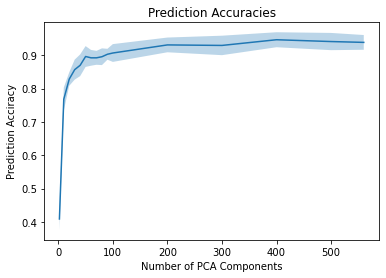

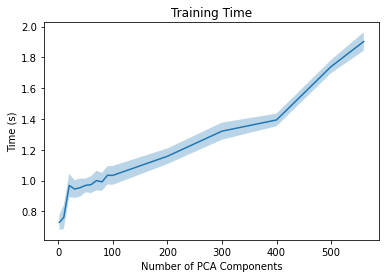

In [60]:
# Get means
acc_mean = np.mean(results1, axis=1)
acc_stds = np.std(results1, axis=1)
time_mean = np.mean(times1, axis=1)
time_stds = np.std(times1, axis=1)

# Plot prediction accuracies
fig, ax = plt.subplots()
ax.plot(num_features, acc_mean)
ax.fill_between(num_features, acc_mean+acc_stds, acc_mean-acc_stds, alpha=0.3)
ax.set(title="Prediction Accuracies", xlabel="Number of PCA Components", ylabel="Prediction Acciracy")
plt.show()

# Plot timing
fig, ax = plt.subplots()
ax.plot(num_features, time_mean)
ax.fill_between(num_features, time_mean+time_stds, time_mean-time_stds, alpha=0.3)
ax.set(title="Training Time", xlabel="Number of PCA Components", ylabel="Time (s)")
plt.show()